In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [54]:
teams_df = pd.read_csv('data/2025/mens_champ_teams.csv')
teams_df

,Club ID,Club
0,175734,THE BOROUGH FC MEN
1,175326,GUELPH UNITED MEN
2,175331,HAMILTON UNITED MEN
3,175387,MASTER'S FA MEN
4,175391,NORTH MISSISSAUGA SC MEN
5,175414,PICKERING FC MEN
6,176208,SUDBURY CYCLONES MEN
7,175408,UNIONVILLE MILLIKEN SC MEN
8,183406,WATERLOO UNITED MEN
9,183408,WHITBY FC MEN


In [55]:
scores_df = pd.read_csv('data/2025/2025-06_mens_champ_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,261900695,3,3,183189,175405
1,261900696,1,2,175414,183406
2,261900697,1,2,175331,175734
3,261900698,2,1,175387,175408
4,261900702,0,1,175387,183189
5,261900703,3,1,175391,175405
6,261900704,2,2,175414,183408
7,261900705,3,1,176208,175734
8,261900706,2,1,175408,183406
9,261900707,3,1,175326,183189


In [56]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [57]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
261900695                   0                  0                    0                0                         0                 0                     0                           0                    0              0                   -1                        1
261900696                   0                  0                    0                0                         0                -1                     0                           0                    1              0                    0                        0
261900697                   1                  0                   -1                0                         0                 0                     0                           0                    0          

In [58]:
print(X_df.T.to_string())

                            261900695  261900696  261900697  261900698  261900702  261900703  261900704  261900705  261900706  261900707  261900708  261900709  261900710  261900711  261900712  261900713  261900714  261900715  261900716  261900717  261900718  261900719  261900720  261900721  261900722  261900723  261900724  261900725  261900726  261900727  261900728  261900729  261900730
THE BOROUGH FC MEN                  0          0          1          0          0          0          0         -1          0          0          0          0          0          0          1          0         -1          0          0          0          0          1          0          0          0          0          0          0          0          0          0          0          1
GUELPH UNITED MEN                   0          0          0          0          0          0          0          0          0          1          0          0          0          0          0          0          0       

In [59]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                           6                  0                   -1                0                        -2                 0                    -2                           0                   -1              0                    0                        0
GUELPH UNITED MEN                            0                  4                   -1                0                        -1                 0                     0                           0                    0              0                    0                       -2
HAMILTON UNITED MEN                         -1                 -1                    5               -1                         0                 0             

In [60]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                           6                  0                   -1                0                        -2                 0                    -2                           0                   -1              0                    0                        0
GUELPH UNITED MEN                            0                  4                   -1                0                        -1                 0                     0                           0                    0              0                    0                       -2
HAMILTON UNITED MEN                         -1                 -1                    5               -1                         0                 0             

In [61]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
p_bar_df_sorted = p_bar_df.sort_values(by=['GD'], ascending=False)
print(p_bar_df_sorted.to_string())

                            GD
THE BOROUGH FC MEN           5
WATERLOO UNITED MEN          3
MASTER'S FA MEN              2
GUELPH UNITED MEN            2
WHITBY FC MEN                2
YORK UNITED ACADEMY MEN      0
UNIONVILLE MILLIKEN SC MEN   0
WINDSOR CITY FC MEN          0
SUDBURY CYCLONES MEN        -1
PICKERING FC MEN            -2
HAMILTON UNITED MEN         -6
NORTH MISSISSAUGA SC MEN    -6


In [62]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
p_bar_bw_df_sorted = p_bar_bw_df.sort_values(by=['GD with limited blowouts'], ascending=False)
print(p_bar_bw_df_sorted.to_string())

                            GD with limited blowouts
THE BOROUGH FC MEN                                 4
GUELPH UNITED MEN                                  2
MASTER'S FA MEN                                    2
UNIONVILLE MILLIKEN SC MEN                         1
WHITBY FC MEN                                      1
SUDBURY CYCLONES MEN                               1
WATERLOO UNITED MEN                                1
WINDSOR CITY FC MEN                                0
YORK UNITED ACADEMY MEN                            0
PICKERING FC MEN                                  -2
NORTH MISSISSAUGA SC MEN                          -5
HAMILTON UNITED MEN                               -6


In [63]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                            massey_rating
WHITBY FC MEN                    0.914756
WATERLOO UNITED MEN              0.843166
UNIONVILLE MILLIKEN SC MEN       0.655037
MASTER'S FA MEN                  0.589607
PICKERING FC MEN                 0.369765
THE BOROUGH FC MEN               0.262235
YORK UNITED ACADEMY MEN          0.235834
SUDBURY CYCLONES MEN             0.058462
GUELPH UNITED MEN               -0.107740
WINDSOR CITY FC MEN             -0.918494
HAMILTON UNITED MEN             -1.418577
NORTH MISSISSAUGA SC MEN        -1.484051


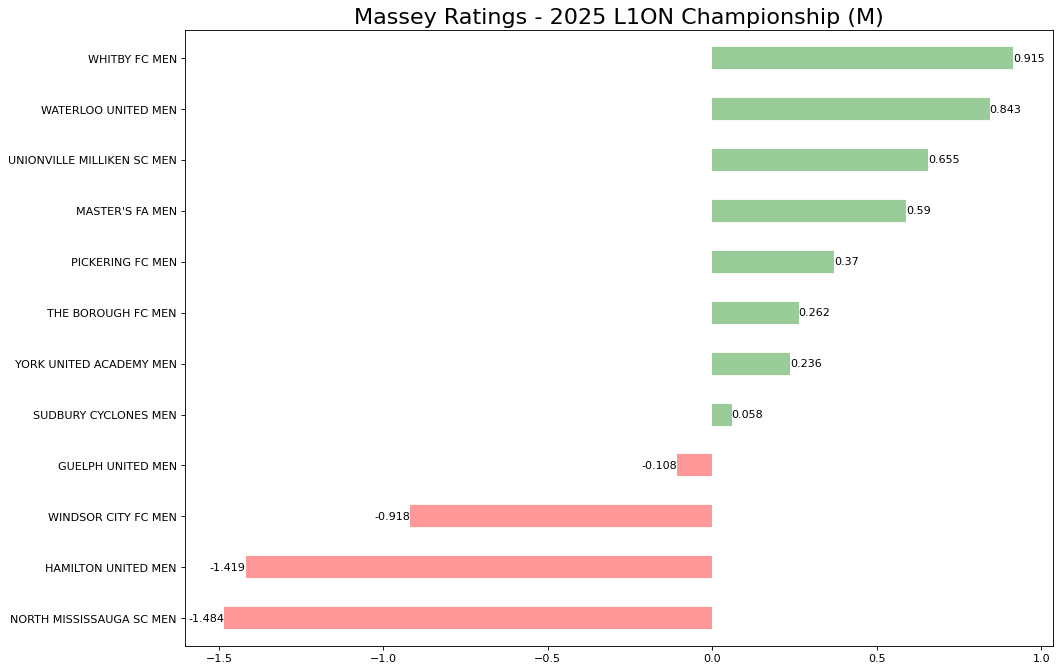

In [64]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (M)', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [65]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                            massey_rating
UNIONVILLE MILLIKEN SC MEN       0.603060
WHITBY FC MEN                    0.592531
WATERLOO UNITED MEN              0.573691
MASTER'S FA MEN                  0.481150
SUDBURY CYCLONES MEN             0.385898
THE BOROUGH FC MEN               0.265582
YORK UNITED ACADEMY MEN          0.227016
PICKERING FC MEN                 0.198648
GUELPH UNITED MEN               -0.024898
WINDSOR CITY FC MEN             -0.749056
NORTH MISSISSAUGA SC MEN        -1.198369
HAMILTON UNITED MEN             -1.355255


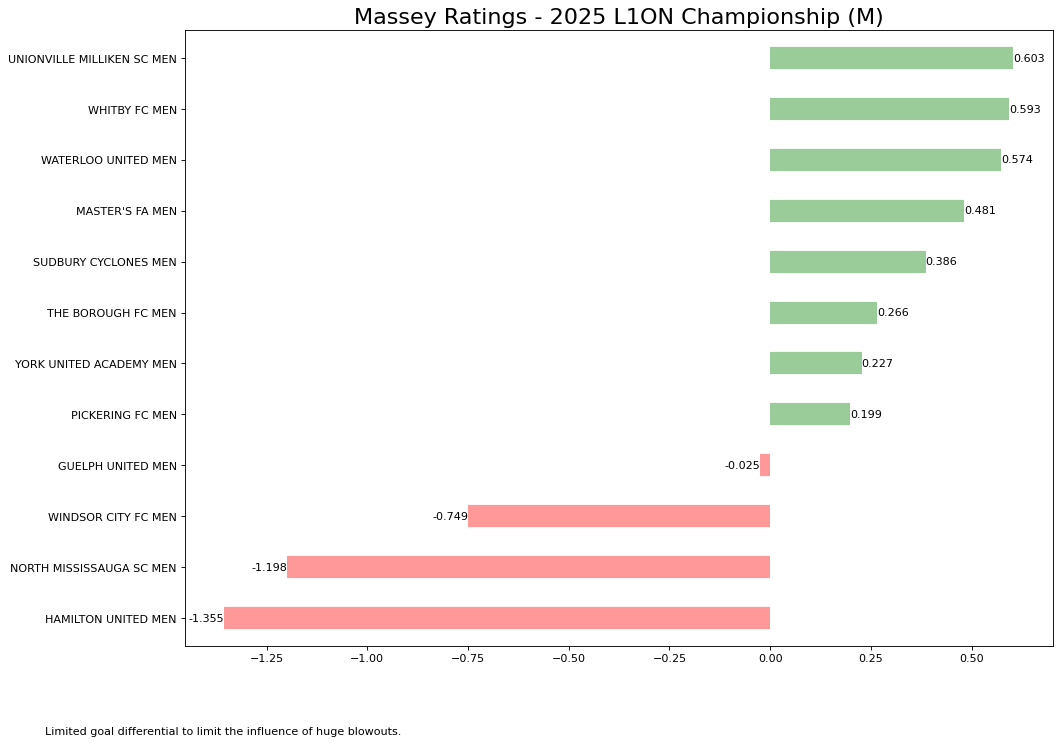

In [66]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (M)', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()